# Analyze forcing data
Estimate half-life and correlation length scales

In [1]:
from fmdap import AR1
from fmdap import spatial
from mikeio import Dfsu
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
wind_file = '../tests/testdata/Wind_1hr.dfsu'
dfs = Dfsu(wind_file)
dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Items:
  0:  Wind speed <Wind speed> (meter per sec)
  1:  Wind direction <Wind Direction> (degree)
Time: 67 steps with dt=3600.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

## Estimate half-life
Assuming the wind time propagation is a AR(1) process. We extract a time series in a random point and estimate the half-life.

In [3]:
df = dfs.read(items=["Wind speed"], elements=[45]).to_dataframe()

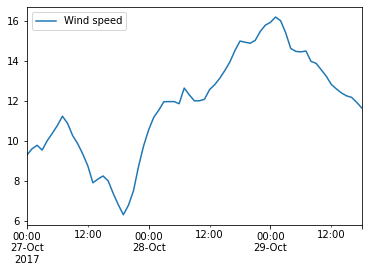

In [4]:
df.plot();

In [5]:
rho = AR1.estimate_AR1_halflife(df)
print(f"Estimated AR(1) half-life: {rho/3600:.1f} hours")

Estimated AR(1) half-life: 34.0 hours


Let's simulate a few AR(1) processes with the same half-life

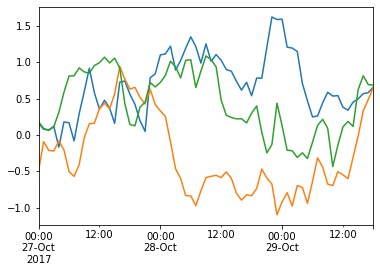

In [6]:
fig, ax = plt.subplots() 
for j in range(3):
    AR1.simulate_AR1(halflife=rho, index=df.index).plot(ax=ax, legend=None)

## Estimate spatial correlation
Take a sample of elements, calculate all pairwise distances and the correlation coefficient between them. 

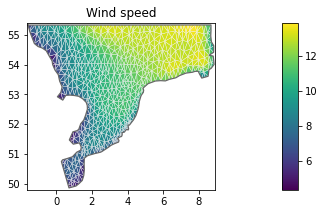

In [7]:
data = dfs.read(items="Wind speed", time_steps=0)[0]
dfs.plot(data[0,:], title="Wind speed");

In [8]:
d, cc = spatial.get_distance_and_corrcoef(dfs, n_sample=200)
len(d)

19900

Fit a Gaussian to the data...

In [9]:
spatial_corr = spatial.fit_gaussian(d, cc, max_dist = 400e3)
print(f"Estimated correlation length scale: {spatial_corr/1000:.2f}km")

Estimated correlation length scale: 542.02km


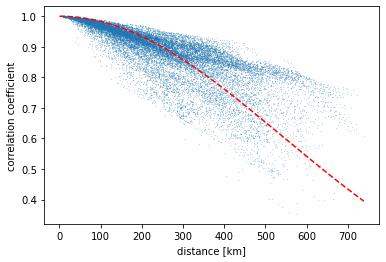

In [10]:
plt.scatter(d/1000, cc, s=0.01)
xx = np.linspace(0, max(d),101)
plt.plot(xx/1000, spatial.gaussian(xx, spatial_corr), 'r--')
plt.xlabel("distance [km]")
plt.ylabel("correlation coefficient");